### Génerer Aléatoirement un labyrinthe 

In [58]:
# importation des bibliothéques
import random
import matplotlib.pyplot as plt
import numpy as np

In [114]:
# Dimensions de la grille:
LARGEUR = 3
HAUTEUR = 3
TAILLE_LARG= 2 * LARGEUR + 1
TAILLE_HAUT= 2 * HAUTEUR + 1

# Graphe de référence

class Maillon:

    def __init__(self, valeur, suivant=None):
        self.valeur = valeur
        self.suivant = suivant



class Pile:

    def __init__(self):
        self.taille = 0 # nombre d'assiettes dans la pile
        self.sommet = None


    def empiler(self, valeur):
        self.sommet = Maillon(valeur, self.sommet)
        self.taille += 1

    def depiler(self):
        if self.taille > 0:
            valeur = self.sommet.valeur
            self.sommet = self.sommet.suivant
            self.taille -= 1
            return valeur

    def estVide(self):
        return self.taille == 0


    def lireSommet(self):
        return self.sommet.valeur

In [115]:
def voisinage(couple):
    """
    Renvoie la liste des cellules voisines
    de la cellule (ligne, colonne) = couple dans la grille.
    """
    listeVoisins = []
    i, j = couple[0], couple[1]

    for d in (-1, 1):
        if -1 < i+d < HAUTEUR: listeVoisins.append( (i+d, j) )
        if   -1 < j+d < LARGEUR: listeVoisins.append( (i, j+d) )
    
    return listeVoisins

In [116]:
# parcour en profondeur

def dfs(s) :
    P = {s: None}
    Q = Pile()
    Q.empiler(s)
    while not(Q.estVide()) :
        u = Q.lireSommet()
        R=[y for y in voisinage(u) if y not in P]
        if R :
            v=random.choice(R)
            P[v]=u
            Q.empiler(v)
        else :
            Q.depiler()
    return P

In [117]:
# On crée une fonction pour le chemin le plus cour vers la sortie
def find_path(graph, start, end, path=[]): 
    path = path + [start] 
    if start == end: 
        return path 
    for node in graph[start]: 
        if node not in path: 
            newpath = find_path(graph, node, end, path) 
            if newpath: 
                return newpath 

In [118]:
# On crée une fonction pour convertir le parcour en dictionnaire
def convDic (d):
    dic_new = {}
    for i in d.keys():
        dic_new[i] = [d[i]]
        if d[i] in dic_new.keys():
            dic_new[d.get(i)].append(i)
    for i in d.keys():
        dic_new[i] = {node : 1 for node in dic_new[i] if node != None }
    return dic_new

In [143]:

def dedale():
    """
    Fonction dessinant le résultat 
    """
    
    labyrinthe = [ [0 for j in range(TAILLE_LARG)] for i in range(TAILLE_HAUT)]
    
    
    
    for i,j in parcours:
        labyrinthe[2*i+1][2*j+1] = 3
        if (i,j) !=  (0,0):
            k,l = parcours[(i,j)]
            labyrinthe[2*k+1][2*l+1] = 3
            labyrinthe[i+k+1][j+l+1] = 3
     
    for (i,j) in path:
        labyrinthe[2*i+1][2*j+1] = 20
        if (i,j) !=  (0,0):
            k,l = parcours[(i,j)]
            labyrinthe[2*k+1][2*l+1] = 20
            labyrinthe[i+k+1][j+l+1] = 20
    labyrinthe[1][0] = 10
    labyrinthe[2*HAUTEUR-1][2*LARGEUR] = 20
    return labyrinthe

In [144]:
# On crée une fonction pour dessinée le labyrinthe
def dessine(lab):
    # le graphique:
    plt.figure(figsize= (6,6))
    plt.imshow(lab)

    # on cache les graduations:
    plt.xticks([])
    plt.yticks([])

    noeud= []
    for index, x in np.ndenumerate(lab):
        #print("index: ",index[0], index[1], x)   
        if x== 1: #labyrinthe[index[0], index[1]]
            noeud.append((index[0], index[1]))   
            #print("\tnoeud !",index[0], index[1])   

    return noeud

In [145]:
 # On crée une fonction pour heirarchiser le Graph de solution 
import numpy as  np
import networkx as nx
def hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, 
                  pos = None, parent = None):
    '''If there is a cycle that is reachable from root, then this will see infinite recursion.
       G: the graph
       root: the root node of current branch
       width: horizontal space allocated for this branch - avoids overlap with other branches
       vert_gap: gap between levels of hierarchy
       vert_loc: vertical location of root
       xcenter: horizontal location of root
       pos: a dict saying where all nodes go if they have been assigned
       parent: parent of this branch.'''
    if pos == None:
        pos = {root:(xcenter,vert_loc)}
    else:
        pos[root] = (xcenter, vert_loc)
    neighbors = list(G.neighbors(root)) 
    if parent != None:   #this should be removed for directed graphs.
        neighbors.remove(parent)  #if directed, then parent not in neighbors.
    if len(neighbors)!=0:
        dx = width/len(neighbors) 
        nextx = xcenter - width/2 - dx/2
        for neighbor in neighbors:
            nextx += dx
            pos = hierarchy_pos(G,neighbor, width = dx, vert_gap = vert_gap, 
                                vert_loc = vert_loc-vert_gap, xcenter=nextx, pos=pos, 
                                parent = root)
    return pos

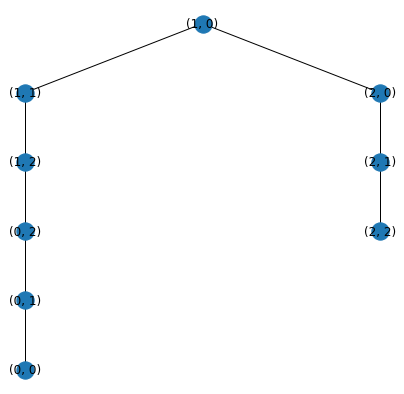

In [146]:
# dessiner le Graph
G = nx.Graph()

for i, v in dic.items():
    for k in v:
        G.add_edge(i, k)

f, ax= plt.subplots(figsize=(7,7))
pos = hierarchy_pos(G, (1,0))    
nx.draw(G, pos=pos, with_labels=True)

[(0, 0), (0, 1), (0, 2), (1, 2), (2, 2)]

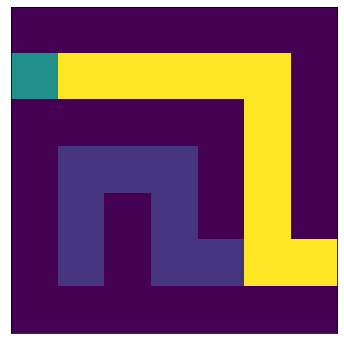

In [147]:
parcours = dfs((0,0))
dic = convDic(parcours)
path = find_path(dic, (0, 0), (HAUTEUR-1,LARGEUR-1))
labyrinthe= dedale()
noeud = dessine(labyrinthe)
path